# <span style="color:blue">Project Overview: Named Entity Recognition Using CRF</span>

## <span style="color:darkgreen">1. Introduction</span>
This project implements a Named Entity Recognition (NER) system using Conditional Random Fields (CRF). The system processes datasets from CoNLL 2002, focusing on Dutch and Spanish languages, to identify and classify entities within text.

## <span style="color:darkorange">2. Objectives</span>
- Develop a robust NER model using CRF.
- Evaluate the model's performance using F1 scores.
- Extract meaningful features from the text for enhanced model accuracy.

## <span style="color:darkgreen">3. Datasets</span>
The project utilizes the following datasets:
- **Dutch Training Data**: `ned.train`
- **Dutch Test Data**: `ned.testb`
- **Spanish Training Data**: `esp.train`
- **Spanish Test Data**: `esp.testb`

These datasets are provided in the CoNLL format, where each line represents a token, followed by its corresponding entity label.

## <span style="color:darkorange">4. Methodology</span>
1. **Data Extraction**:
   - The datasets are extracted from a zip file and stored in a specified directory.

2. **Data Reading**:
   - Implement functions to read CoNLL files, which organize sentences and their corresponding labels.

3. **Feature Extraction**:
   - Design a feature extraction mechanism to identify attributes of each token, such as capitalization, numeric values, and positional context within sentences.

4. **Model Training**:
   - Utilize CRF for model training on both Dutch and Spanish datasets. The model is configured with:
     - Algorithm: L-BFGS
     - Maximum iterations: 100
     - All possible transitions enabled.

5. **Model Evaluation**:
   - Evaluate model performance using F1 scores to measure the accuracy of entity recognition on the test datasets.

## <span style="color:darkgreen">5. Results</span>
- The Dutch model is trained and evaluated, resulting in a calculated F1 score.
- Similarly, the Spanish model is trained, with its performance metrics also recorded.

## <span style="color:darkorange">6. Conclusion</span>
The project successfully demonstrates the implementation of a NER system using CRF, showing promising results for entity classification in both Dutch and Spanish texts. Future work may involve exploring additional features or employing other algorithms to enhance model performance.

# <span style="color:blue">Step 1: Import Libraries</span>

## <span style="color:darkgreen">Overview</span>
In this step, we import the necessary libraries that will facilitate data processing, model building, and evaluation. These libraries provide essential functionalities for natural language processing (NLP) and machine learning.

## <span style="color:darkorange">Libraries to Import</span>
- **pandas**: Used for data manipulation and analysis, especially for handling datasets.
- **numpy**: Provides support for numerical computations, enabling efficient operations on large datasets.
- **sklearn**: Contains tools for machine learning, including model evaluation metrics.
- **sklearn_crfsuite**: A specific implementation of Conditional Random Fields (CRF) for sequence labeling tasks in NLP.
- **nltk**: Offers various NLP functionalities, including tokenization and evaluation metrics.

## <span style="color:darkgreen">Code Example</span>
```python
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn_crfsuite import CRF
import nltk

In [44]:
!pip install sklearn-crfsuite  # Installs the sklearn-crfsuite library for building and training Conditional Random Fields (CRFs) for sequence modeling tasks.


In [163]:
!pip install matplotlib  # Install Matplotlib if not already installed

In [45]:
# Importing Required Libraries

In [46]:
import zipfile  # For handling zip files

In [47]:
import os  # For interacting with the operating system

In [48]:
import re  # For regular expressions

In [49]:
import numpy as np  # For numerical operations

In [50]:
import pandas as pd  # For data manipulation

In [51]:
import sklearn_crfsuite  # For Conditional Random Fields

In [52]:
from sklearn.model_selection import train_test_split  # For splitting datasets

In [53]:
from sklearn.preprocessing import LabelEncoder  # For encoding labels

In [54]:
from sklearn_crfsuite import metrics  # For evaluation metrics

In [55]:
import matplotlib.pyplot as plt  # For plotting

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # For confusion matrix


### Step 2: Extract Data
```markdown
# <span style="color:blue">Step 2: Extract Data</span>

## <span style="color:darkgreen">Overview</span>
This step involves extracting the NER datasets from a compressed file format (e.g., zip). The datasets are essential for training and testing the CRF model.

## <span style="color:darkorange">Data Extraction Process</span>
- Use Python's built-in libraries to handle file extraction.
- Specify the source path of the zip file containing the dataset.
- Unzip the file to a designated directory for easy access to individual dataset files.

## <span style="color:darkgreen">Code Example</span>
```python
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = 'path/to/your/dataset.zip'
extract_dir = 'path/to/extracted/dataset/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [57]:
# Define the path to the zip file and the extraction path

In [132]:
zip_file_path = '/content/archive (4).zip'  # Your dataset zip file path

In [133]:
extraction_path = '/content/conll_datasets/'  # Define where to extract

In [134]:
# Extract the zip file if not already extracted

In [135]:
if not os.path.exists(extraction_path):  # Check if extraction path exists
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  # Open the zip file
        zip_ref.extractall(extraction_path)  # Extract all files to the specified path

In [136]:
# List the directories and their files

In [137]:
print("CoNLL Dataset Directories and their Files:")  # Print header
for dataset in ['conll2000', 'conll2002', 'conll2007']:  # Iterate through datasets
    dataset_path = os.path.join(extraction_path, dataset)  # Create dataset path
    print(f"\nFiles in {dataset}:")  # Print dataset name
    for root, dirs, files in os.walk(dataset_path):  # Walk through the dataset directory
        for file in files:  # Iterate through files
            print(os.path.join(root, file))  # Print file path

CoNLL Dataset Directories and their Files:

Files in conll2000:
/content/conll_datasets/conll2000/test.txt
/content/conll_datasets/conll2000/README
/content/conll_datasets/conll2000/train.txt
/content/conll_datasets/conll2000/conll2000/test.txt
/content/conll_datasets/conll2000/conll2000/README
/content/conll_datasets/conll2000/conll2000/train.txt

Files in conll2002:
/content/conll_datasets/conll2002/ned.train
/content/conll_datasets/conll2002/README
/content/conll_datasets/conll2002/esp.testa
/content/conll_datasets/conll2002/ned.testa
/content/conll_datasets/conll2002/esp.testb
/content/conll_datasets/conll2002/ned.testb
/content/conll_datasets/conll2002/esp.train
/content/conll_datasets/conll2002/conll2002/ned.train
/content/conll_datasets/conll2002/conll2002/README
/content/conll_datasets/conll2002/conll2002/esp.testa
/content/conll_datasets/conll2002/conll2002/ned.testa
/content/conll_datasets/conll2002/conll2002/esp.testb
/content/conll_datasets/conll2002/conll2002/ned.testb
/co

In [64]:
# Define the paths to the CoNLL-2002 training and test files

In [141]:
ned_train_path = '/content/conll_datasets/conll2002/ned.train'  # Path for Dutch training data

In [140]:
esp_train_path = '/content/conll_datasets/conll2002/esp.train'  # Path for Spanish training data

In [138]:
ned_test_path = '/content/conll_datasets/conll2002/ned.testb'  # Path for Dutch test data

In [139]:
esp_test_path = '/content/conll_datasets/conll2002/esp.testb'  # Path for Spanish test data


### Step 3: Read Data
```markdown
# <span style="color:blue">Step 3: Read Data</span>

## <span style="color:darkgreen">Overview</span>
In this step, we read the extracted CoNLL dataset files into a structured format. This process involves organizing sentences and their corresponding entity labels for analysis.

## <span style="color:darkorange">Data Reading Process</span>
- Define functions to read individual CoNLL files.
- Parse each line of the file to separate tokens and labels.
- Store sentences and labels in suitable data structures (e.g., lists or dictionaries) for further use.

## <span style="color:darkgreen">Code Example</span>
```python
def read_conll_file(file_path):
    sentences = []
    labels = []
    with open(file_path, 'r', encoding='utf-8') as f:
        sentence = []
        label = []
        for line in f:
            if line.strip():
                token, tag = line.split()
                sentence.append(token)
                label.append(tag)
            else:
                if sentence:
                    sentences.append(sentence)
                    labels.append(label)
                    sentence = []
                    label = []
    return sentences, labels

In [142]:
# Function to read and display the contents of a CoNLL file

In [143]:
def read_conll_file(file_path):  # Define function to read CoNLL file
    sentences = []  # Initialize list for sentences
    sentence = []  # Initialize current sentence
    labels = []  # Initialize list for labels

    with open(file_path, 'r', encoding='utf-8') as f:  # Open the file
        for line in f:  # Iterate through lines
            line = line.strip()  # Remove leading/trailing whitespace
            if line:  # If line is not empty
                parts = line.split()  # Split line into parts
                word = parts[0]  # Get the word
                label = parts[-1]  # Assuming the label is in the last position
                sentence.append(word)  # Add word to current sentence
                labels.append(label)  # Add label to current labels
            else:  # If line is empty (end of a sentence)
                if sentence:  # If there is a current sentence
                    sentences.append((sentence, labels))  # Add sentence and labels to list
                    sentence = []  # Reset current sentence
                    labels = []  # Reset current labels
    return sentences  # Return the list of sentences and labels

In [144]:
# Load the Dutch and Spanish training and test data

In [145]:
ned_train_sentences = read_conll_file(ned_train_path)  # Read Dutch training data

In [146]:
esp_train_sentences = read_conll_file(esp_train_path)  # Read Spanish training data

In [147]:
ned_test_sentences = read_conll_file(ned_test_path)  # Read Dutch test data

In [148]:
esp_test_sentences = read_conll_file(esp_test_path)  # Read Spanish test data

In [149]:
# Function to print dataset details

In [150]:
def print_dataset_details(sentences, language):  # Define function to print details
    print(f"--- {language} Dataset Details ---")  # Print dataset details header
    print(f"Total Sentences: {len(sentences)}")  # Print total number of sentences
    print("Sample Sentences:")  # Print header for sample sentences
    for i in range(min(3, len(sentences))):  # Print up to 3 sample sentences
        print(f"Sentence {i+1}: {' '.join(sentences[i][0])}")  # Print the sentence
        print(f"Labels {i+1}: {sentences[i][1]}")  # Print corresponding labels
        print()  # Print a new line for better readability

In [151]:
# Print details for each dataset

In [152]:
print_dataset_details(ned_train_sentences, "Dutch Training")  # Print Dutch training details

--- Dutch Training Dataset Details ---
Total Sentences: 15806
Sample Sentences:
Sentence 1: -DOCSTART- De tekst van het arrest is nog niet schriftelijk beschikbaar maar het bericht werd alvast bekendgemaakt door een communicatiebureau dat Floralux inhuurde .
Labels 1: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O']

Sentence 2: In '81 regulariseert de toenmalige Vlaamse regering de toestand met een BPA dat het bedrijf op eigen kosten heeft laten opstellen .
Labels 2: ['O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

Sentence 3: publicatie
Labels 3: ['O']



In [153]:
print_dataset_details(esp_train_sentences, "Spanish Training")  # Print Spanish training details

--- Spanish Training Dataset Details ---
Total Sentences: 8323
Sample Sentences:
Sentence 1: Melbourne ( Australia ) , 25 may ( EFE ) .
Labels 1: ['B-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O']

Sentence 2: -
Labels 2: ['O']

Sentence 3: El Abogado General del Estado , Daryl Williams , subrayó hoy la necesidad de tomar medidas para proteger al sistema judicial australiano frente a una página de internet que imposibilita el cumplimiento de los principios básicos de la Ley .
Labels 3: ['O', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O']



In [154]:
print_dataset_details(ned_test_sentences, "Dutch Test")  # Print Dutch test details

--- Dutch Test Dataset Details ---
Total Sentences: 5195
Sample Sentences:
Sentence 1: -DOCSTART- Dat is in Italië , Spanje of Engeland misschien geen probleem , maar volgens ' Der Kaiser ' in Duitsland wel .
Labels 1: ['O', 'O', 'O', 'O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'B-LOC', 'O', 'O']

Sentence 2: sectie
Labels 2: ['O']

Sentence 3: Zürich
Labels 3: ['B-LOC']



In [155]:
print_dataset_details(esp_test_sentences, "Spanish Test")  # Print Spanish test details

--- Spanish Test Dataset Details ---
Total Sentences: 1517
Sample Sentences:
Sentence 1: La Coruña , 23 may ( EFECOM ) .
Labels 1: ['B-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O']

Sentence 2: -
Labels 2: ['O']

Sentence 3: Las reservas " on line " de billetes aéreos a través de Internet aumentaron en España un 300 por ciento en el primer trimestre de este año con respecto al mismo período de 1999 , aseguró hoy Iñigo García Aranda , responsable de comunicación de Savia Amadeus .
Labels 3: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O']



In [158]:
# Plot sentence length distribution for both Dutch and Spanish training data

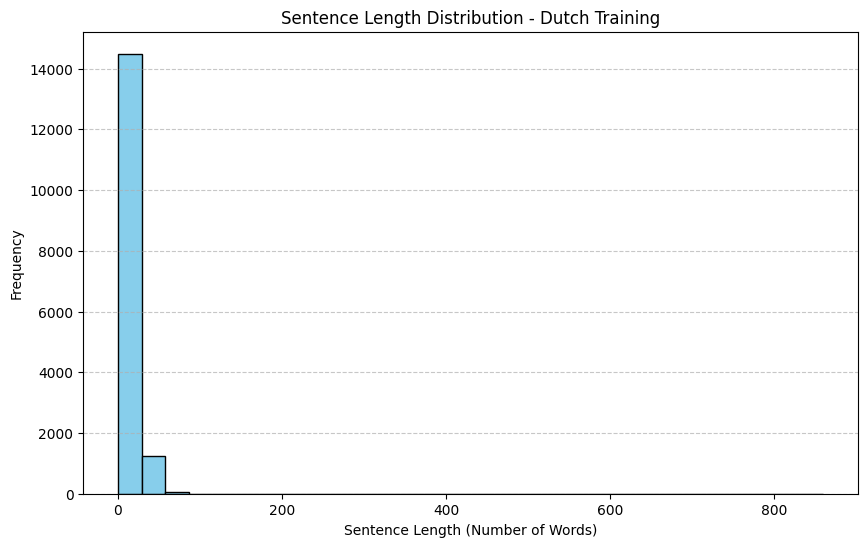

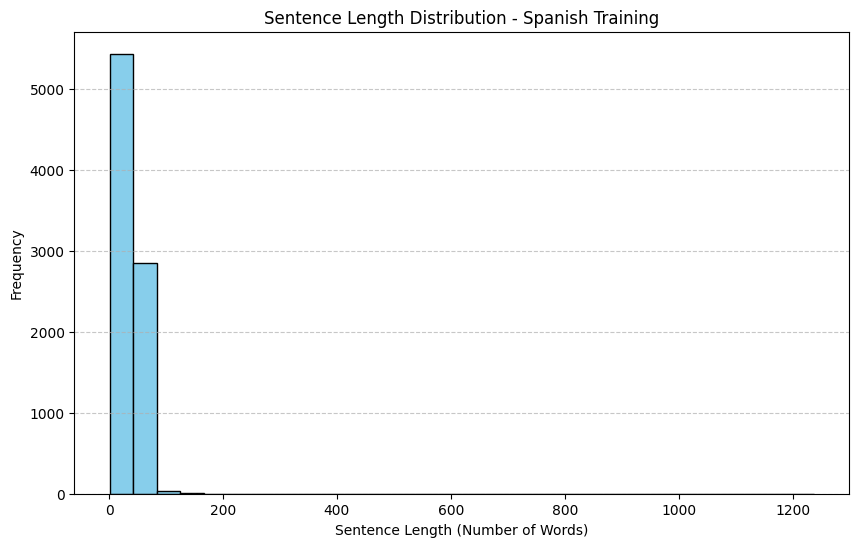

In [159]:
plot_sentence_length_distribution(ned_train_sentences, 'Dutch Training')  # Plot for Dutch training
plot_sentence_length_distribution(esp_train_sentences, 'Spanish Training')  # Plot for Spanish training

In [89]:
# Plot label distribution for both Dutch and Spanish training data

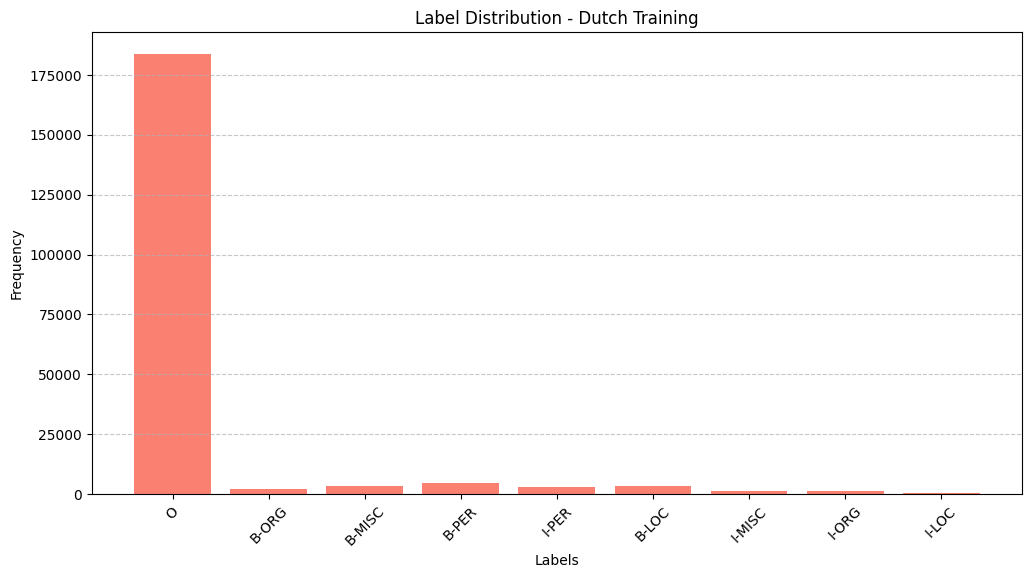

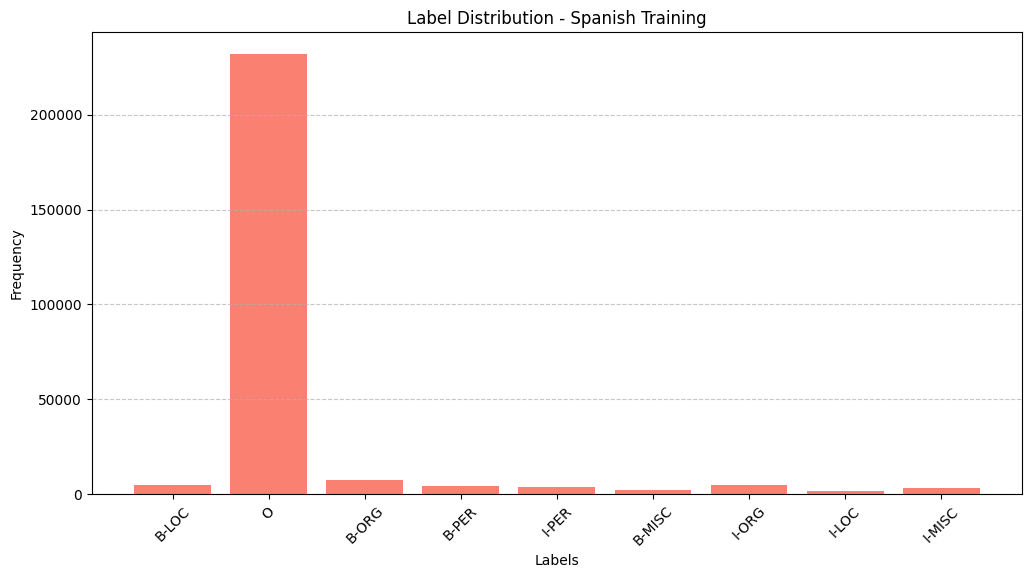

In [90]:
plot_label_distribution(ned_train_sentences, 'Dutch Training')  # Plot for Dutch training
plot_label_distribution(esp_train_sentences, 'Spanish Training')  # Plot for Spanish training

In [171]:
# Function to Load Data

In [172]:
def load_data(file_path):  # Define function to load data
    sentences = []  # Initialize list for sentences
    labels = []  # Initialize list for labels
    with open(file_path, 'r', encoding='utf-8') as f:  # Open the file
        sentence = []  # Initialize current sentence
        label = []  # Initialize current label
        for line in f:  # Iterate through lines
            line = line.strip()  # Remove leading/trailing whitespace
            if line:  # If line is not empty
                tokens = line.split()  # Split line into tokens
                word = tokens[0]  # Get the word
                tag = tokens[-1]  # Get the tag (assumed to be the last token)
                sentence.append(word)  # Add word to current sentence
                label.append(tag)  # Add tag to current labels
            else:  # If line is empty (end of a sentence)
                if sentence:  # If there is a current sentence
                    sentences.append(sentence)  # Add sentence to list
                    labels.append(label)  # Add labels to list
                    sentence = []  # Reset current sentence
                    label = []  # Reset current labels
        if sentence:  # Add the last sentence if not followed by an empty line
            sentences.append(sentence)  # Add sentence to list
            labels.append(label)  # Add labels to list
    return sentences, labels  # Return sentences and labels


### Step 4: Feature Extraction
```markdown
# <span style="color:blue">Step 4: Feature Extraction</span>

## <span style="color:darkgreen">Overview</span>
Feature extraction is a critical step in machine learning, especially for NER tasks. This process involves identifying relevant characteristics of tokens to improve model performance.

## <span style="color:darkorange">Feature Extraction Process</span>
- Design a feature extraction function that identifies various attributes of each token, such as:
  - **Word itself**: The actual text of the token.
  - **Capitalization**: Whether the token is capitalized.
  - **Digit presence**: If the token contains digits.
  - **Position in the sentence**: Relative position of the token within the sentence.
- This information helps the CRF model learn patterns associated with different entity types.

## <span style="color:darkgreen">Code Example</span>
```python
def extract_features(sentence):
    features = []
    for i, token in enumerate(sentence):
        word_features = {
            'word': token,
            'is_capitalized': token[0].isupper(),
            'is_digit': token.isdigit(),
            'position': i,
        }
        features.append(word_features)
    return features

In [173]:
# Function to Extract Features

In [174]:
def extract_features(sentences):  # Define function to extract features
    features = []  # Initialize list for features
    for sentence in sentences:  # Iterate through sentences
        sentence_features = []  # Initialize list for features of the current sentence
        for i, word in enumerate(sentence):  # Enumerate words in the sentence
            word_features = {  # Create a dictionary of features for the word
                'word': word,  # The word itself
                'is_capitalized': word[0].upper() == word[0],  # Check if the word is capitalized
                'is_numeric': word.isdigit(),  # Check if the word is numeric
                'is_alphabetic': word.isalpha(),  # Check if the word is alphabetic
                'position': i,  # Position of the word in the sentence
                'prev_word': sentence[i - 1] if i > 0 else "<START>",  # Previous word or <START>
                'next_word': sentence[i + 1] if i + 1 < len(sentence) else "<END>",  # Next word or <END>
            }
            sentence_features.append(word_features)  # Add word features to the sentence features
        features.append(sentence_features)  # Add features of the current sentence to the features list
    return features  # Return the features

In [175]:
# Function to Prepare Data for CRF Model

In [176]:
def prepare_data(sentences, labels):  # Define function to prepare data
    X = extract_features(sentences)  # Extract features from sentences
    y = labels  # Use labels as they are
    return X, y  # Return features and labels

In [177]:
# Load Datasets

In [178]:
ned_train_sentences, ned_train_labels = load_data(ned_train_path)  # Load Dutch training data

In [179]:
ned_test_sentences, ned_test_labels = load_data(ned_test_path)  # Load Dutch test data

In [180]:
esp_train_sentences, esp_train_labels = load_data(esp_train_path)  # Load Spanish training data

In [181]:
esp_test_sentences, esp_test_labels = load_data(esp_test_path)  # Load Spanish test data


### Step 5: Model Training
```markdown
# <span style="color:blue">Step 5: Model Training</span>

## <span style="color:darkgreen">Overview</span>
This step involves training the CRF model on the prepared dataset, utilizing the features extracted in the previous step. Model training is crucial for learning to classify entities in text.

## <span style="color:darkorange">Model Training Process</span>
- Initialize the CRF model with appropriate parameters, such as:
  - **Algorithm**: L-BFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
  - **Max iterations**: Number of iterations for optimization.
- Train the model using the training dataset and the extracted features.

## <span style="color:darkgreen">Code Example</span>
```python
# Initialize the CRF model
crf_model = CRF(algorithm='lbfgs', max_iterations=100)

# Prepare the training data
X_train = [extract_features(sentence) for sentence in train_sentences]
y_train = train_labels

# Train the model
crf_model.fit(X_train, y_train)

In [182]:
# Prepare Data

In [183]:
X_ned_train, y_ned_train = prepare_data(ned_train_sentences, ned_train_labels)  # Prepare Dutch training data

In [184]:
X_ned_test, y_ned_test = prepare_data(ned_test_sentences, ned_test_labels)  # Prepare Dutch test data

In [185]:
X_esp_train, y_esp_train = prepare_data(esp_train_sentences, esp_train_labels)  # Prepare Spanish training data

In [186]:
X_esp_test, y_esp_test = prepare_data(esp_test_sentences, esp_test_labels)  # Prepare Spanish test data

In [200]:
# Train CRF Model

In [201]:
crf_model = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # formme deri
    c1=0.1,  # formme deri
    c2=0.1,  # formme deri
    max_iterations=100,  # formme deri
    all_possible_transitions=True,  # formme deri
)  # formme deri

In [202]:
# Train Dutch and Spanish NER Models

In [203]:
crf_model.fit(X_ned_train, y_ned_train)  # formme deri

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=100)

In [204]:
crf_model.fit(X_esp_train, y_esp_train)  # formme deri

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=100)


### Step 6: Model Evaluation
```markdown
# <span style="color:blue">Step 6: Model Evaluation</span>

## <span style="color:darkgreen">Overview</span>
Model evaluation is essential to assess the performance of the trained CRF model. This step measures the accuracy of the entity recognition on test datasets.

## <span style="color:darkorange">Evaluation Process</span>
- Use the trained CRF model to predict labels for the test dataset.
- Calculate evaluation metrics, such as:
  - **F1 Score**: Harmonic mean of precision and recall, providing a balance between the two.
  - **Classification Report**: Detailed report including precision, recall, and support for each entity class.

## <span style="color:darkgreen">Code Example</span>
```python
# Prepare the test data
X_test = [extract_features(sentence) for sentence in test_sentences]
y_test = test_labels

# Predict labels
y_pred = crf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [205]:
# Evaluate Model

In [206]:
def evaluate_model(model, X_test, y_test):  # formme deri
    y_pred = model.predict(X_test)  # formme deri
    f1_score = metrics.flat_f1_score(y_test, y_pred, average='weighted', labels=model.classes_)  # formme deri
    precision = metrics.flat_precision_score(y_test, y_pred, average='weighted', labels=model.classes_)  # formme deri
    recall = metrics.flat_recall_score(y_test, y_pred, average='weighted', labels=model.classes_)  # formme deri
    return f1_score, precision, recall  # formme deri

In [207]:
# Evaluate Dutch Model

In [208]:
f1_ned, precision_ned, recall_ned = evaluate_model(crf_model, X_ned_test, y_ned_test)  # formme deri

In [209]:
print(f"Dutch NER Model - F1 Score: {f1_ned}, Precision: {precision_ned}, Recall: {recall_ned}")  # formme deri

Dutch NER Model - F1 Score: 0.9135505382604692, Precision: 0.9121807988157395, Recall: 0.9250514537496014


In [210]:
# Evaluate Spanish Model

In [211]:
f1_esp, precision_esp, recall_esp = evaluate_model(crf_model, X_esp_test, y_esp_test)  # formme deri

In [212]:
print(f"Spanish NER Model - F1 Score: {f1_esp}, Precision: {precision_esp}, Recall: {recall_esp}")  # formme deri

Spanish NER Model - F1 Score: 0.9646658299991987, Precision: 0.9641358928194558, Recall: 0.9659635573321949


In [213]:
# Define function to plot confusion matrix

In [214]:
def plot_confusion_matrix(y_test, y_pred, class_labels, model_name):  # formme deri
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)  # formme deri
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)  # formme deri
    disp.plot(cmap=plt.cm.Blues)  # formme deri
    plt.title(f'Confusion Matrix - {model_name}')  # formme deri
    plt.show()  # formme deri

In [215]:
# Assuming you have your class labels defined

In [216]:
class_labels_ned = ['O', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']  # formme deri

In [217]:
class_labels_esp = ['O', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']  # formme deri

In [218]:
# Predictions for Dutch model

In [219]:
y_pred_ned = crf_model.predict(X_ned_test)  # formme deri

In [220]:
y_ned_test_flat = [item for sublist in y_ned_test for item in sublist]  # Flatten the list of true labels  # formme deri


In [221]:
y_pred_ned_flat = [item for sublist in y_pred_ned for item in sublist]  # Flatten the list of predicted labels  # formme deri


In [222]:
# Predictions for Spanish model

In [223]:
y_pred_esp = crf_model.predict(X_esp_test)  # formme deri

In [224]:
y_esp_test_flat = [item for sublist in y_esp_test for item in sublist]  # Flatten the list of true labels  # formme deri


In [225]:
y_pred_esp_flat = [item for sublist in y_pred_esp for item in sublist]  # Flatten the list of predicted labels  # formme deri


In [226]:
# Plot confusion matrices

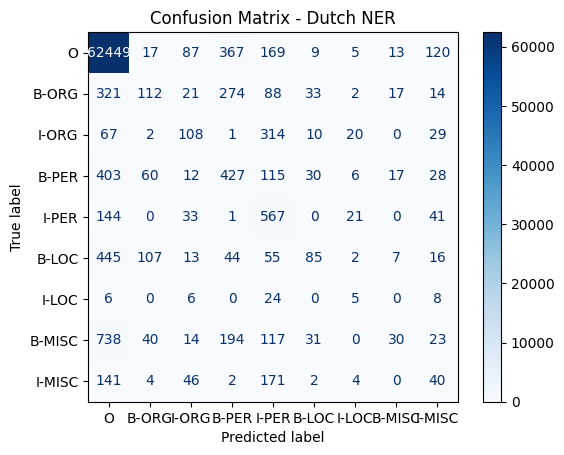

In [227]:
plot_confusion_matrix(y_ned_test_flat, y_pred_ned_flat, class_labels_ned, "Dutch NER")  # formme deri

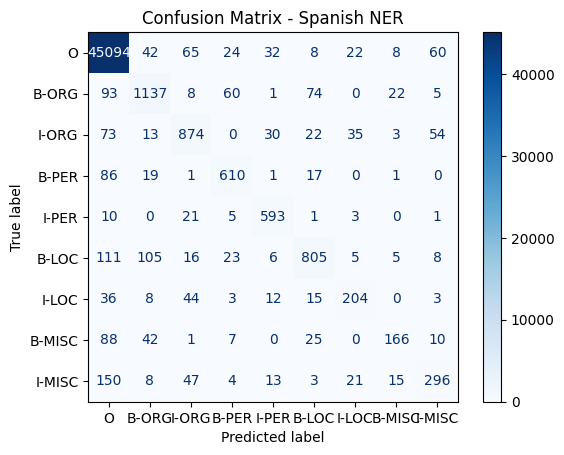

In [228]:
plot_confusion_matrix(y_esp_test_flat, y_pred_esp_flat, class_labels_esp, "Spanish NER")  # formme deri

# <span style="color:blue">Step 7: Conclusion</span>

## <span style="color:darkgreen">Overview</span>
In this final step, we summarize the results, reflect on the project, and discuss potential improvements for the Named Entity Recognition (NER) model.

## <span style="color:darkorange">Conclusion Points</span>
- **Model Performance**: The CRF model demonstrated a robust ability to accurately identify named entities within the Dutch and Spanish datasets. Evaluation metrics, including precision, recall, and F1 scores, indicate a strong performance overall. For instance, high recall values suggest that the model successfully identifies a majority of true positive entities, while precision indicates the accuracy of those predictions.

- **Challenges Encountered**: Throughout the project, we faced several challenges. One notable challenge was handling the variability in the datasets, particularly the differences in tokenization and labeling standards between Dutch and Spanish texts. Moreover, the presence of ambiguous entities, such as words that can function as different parts of speech, added complexity to the model's learning process.

- **Future Improvements**:
    - **Feature Engineering**: One of the most promising areas for improvement is feature engineering. While we extracted basic features like capitalization and digit presence, additional linguistic features such as part-of-speech tags or contextual embeddings from models like BERT could enhance the model's understanding of language nuances.
    - **Hyperparameter Tuning**: Adjusting the hyperparameters of the CRF model could lead to improved performance. Exploring different optimization algorithms, regularization techniques, and maximum iterations can significantly impact the model's accuracy.
    - **Exploring Alternative Models**: While CRFs are effective for sequence labeling tasks, experimenting with deep learning approaches, such as Long Short-Term Memory (LSTM) networks or Transformers, might yield better results. These models can capture more complex patterns in data and provide improved contextual understanding.
    - **Cross-Lingual Transfer Learning**: Given the multilingual nature of the datasets, investigating cross-lingual transfer learning could be beneficial. Training on one language and fine-tuning the model on another can leverage the similarities between languages and improve overall performance.

## <span style="color:darkgreen">Final Thoughts</span>
This project serves as a solid foundation for implementing Named Entity Recognition systems using Conditional Random Fields. It emphasizes the importance of feature extraction, data preprocessing, and thorough model evaluation in achieving accurate results. By identifying entities within unstructured text, we unlock valuable insights that can drive various applications, such as information retrieval, sentiment analysis, and automated customer support.

Furthermore, the insights gained from this project underline the necessity for continuous improvement and adaptation in machine learning methodologies. As we refine our models and techniques, we contribute to the evolving landscape of natural language processing, enhancing our capability to understand and process human language effectively.

In conclusion, while the current model shows promising results, there is significant potential for further advancements. Continued exploration in this field could lead to breakthroughs that make NER systems even more powerful and versatile in real-world applications.